# Modul 6 : Pendeteksian Tepi

## 1 Lakukanlah deteksi tepi dengan menggunakan metode Sobel, Prewitt dan Roberts

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import math

Text(0.5, 1.0, 'Original Image')

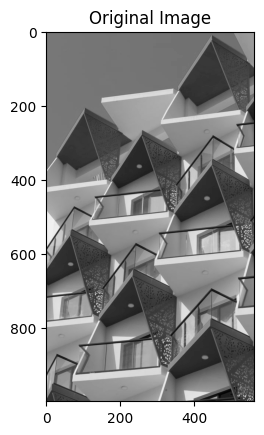

In [2]:
image = plt.imread("Modul6.jpg")
image = cv.cvtColor(image,cv.COLOR_BGR2GRAY)

plt.imshow(image, cmap="gray")
plt.title("Original Image")
# print(image)

#### Function Berikut berfungsi untuk mendapatkan lapisan padding kiri kanan atas dan bawah dari sebuah citra secara dinamis dengan bergantung kepada kernel. Proses pertama yaitu mendapatkan titik tengah dari kernel dengan membagi dua lebar dan tinggi dari kernel. Selanjutnya mendapatkan nilai kiri dan atas yang secara otomatis di dapatkan dari titik tengah kemudian mendapatkan kanan dengan mengurangi panjang dengan titik tengah i dan nilai bawah dengan mengurangi lebar dengan titik tengah j. Setelah didapatkan nilai kiri kanan atas dan bawah, lalu meyiapkan variabel citra padding dengan memasukkan nilai atas bawah kiri dan kanan

In [3]:
def getPadding (image, kernel):
    # mendapatkan titik tengah dari kernel
    i = (kernel.shape[1]-1)//2
    j = (kernel.shape[0]-1)//2
    # menghitung lapisan dari padding yang nanti akan digunakan
    kiri = i
    kanan = (kernel.shape[1]-1)-i
    atas = j
    bawah = (kernel.shape[0]-1)-j

    result = np.pad(image,((atas,bawah),(kiri,kanan)), 'constant', constant_values=0)
    return result

### Function berikut berfungsi untuk melakukan konversi nilai ke biner dengan ambang batas (threshold) yang telah ditentukan

In [4]:
def threshold(value):
    if(value > 128):
        value = 255
    elif(value <= 128):
        value = 0
    return value

### Function berikut berfungsi untuk melakukan perhitungan pendeteksian tepi, function ini nantinya bisa digunakan untuk mencari Sobel, Prewitt maupun Roberts dikarenakan pada dasarnya langkah langkah deteksi tepi pada operator tersebut sama yang membedakan adalah kernel yang digunakan
### Pada setiap operator diberikan dua kernel yaitu x untuk horizontal dan y untuk vertikal, nantinya akan melakukan operasi seperti halnya konvolusi pada setiap kernel dan hasil dari kedua kernel tersebut akan dipangkatkan 2 lalu dijumlahkan dan diakarkan untuk mendapatkan hasil deteksi tepi, ketika mendapatkan hasil dari konvolusi dari kernel x maupun y akan dicari threshold untuk mendapatkan nilai gradientnya baru mendapatkan jasil deteksi tepi seperti sebelumnya

In [5]:
def edgeDetection(image, kernelX, kernelY):
    result = np.zeros(image.shape).astype(int)
    gradientX = np.zeros(image.shape).astype(int)
    gradientY = np.zeros(image.shape).astype(int)
    imgPad = getPadding(image,kernelX)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            x = 0
            y = 0
            for k in range(kernelX.shape[0]):
                for l in range(kernelX.shape[1]):
                    x += imgPad[i+k][j+l] * kernelX[k, l]
                    y += imgPad[i+k][j+l] * kernelY[k, l]
            gradientY[i,j]=threshold(y)
            gradientX[i,j]=threshold(x)
            result[i,j] = math.sqrt(x*x + y*y)
    return result, gradientX, gradientY

### Pada codingan dibawah kita perlu menyiapkan terlebih dahulu masing masing kernel yang akan digunakan nantinya di setiap operator

In [6]:
sobelX = np.array([
    [-1,0,1],
    [-2,0,2],
    [-1,0,1]
    ])
sobelY = np.array([
    [1,2,1],
    [0,0,0],
    [-1,-2,-1]
    ])
prewittX = np.array([
    [-1,0,1],
    [-1,0,1],
    [-1,0,1]
    ])
prewittY = np.array([
    [1,1,1],
    [0,0,0],
    [-1,-1,-1]
    ])
robertX = np.array([
    [1,0],
    [0,-1]
    ])
robertY = np.array([
    [0,1],
    [-1,0]
    ])

### Melakukan Operator Sobel dengan memanggil function deteksi tepi yang telah dibuat sebelumnya dengan paramerte gambar yang akan digunakan lalu kernel x dan y dari sobel

Text(0.5, 1.0, 'Gradient Y')

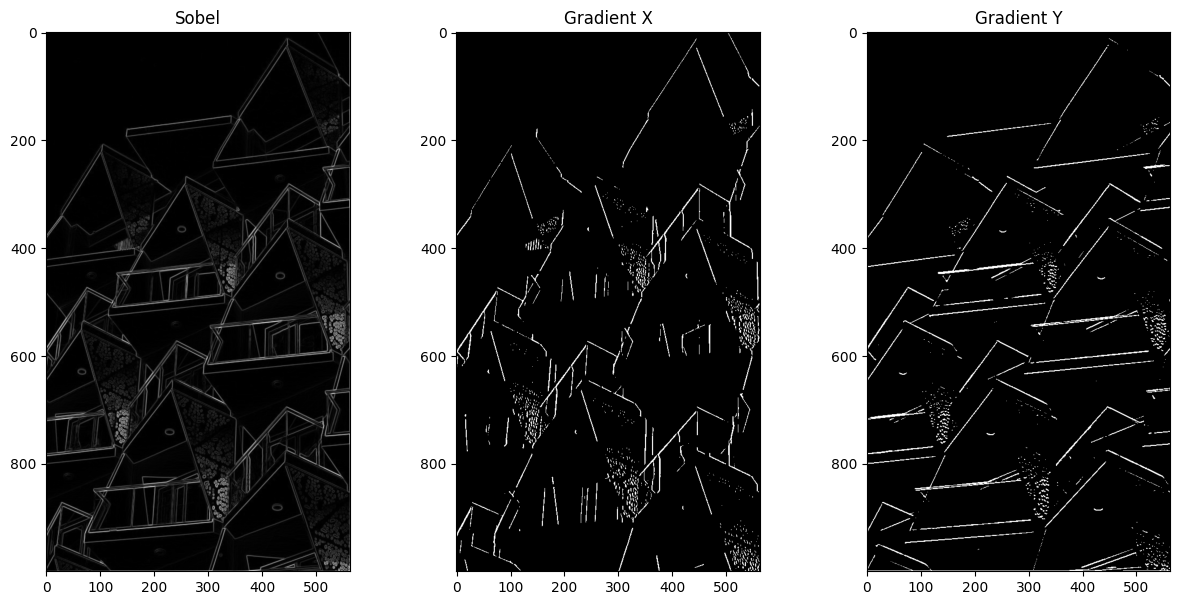

In [7]:
imgSobel, imgSobelX, imgSobelY = edgeDetection(image, sobelX, sobelY)
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,7))
ax[0].imshow(imgSobel, cmap="gray")
ax[0].set_title('Sobel')
ax[1].imshow(imgSobelX, cmap="gray")
ax[1].set_title('Gradient X')
ax[2].imshow(imgSobelY, cmap="gray")
ax[2].set_title('Gradient Y')

### Melakukan Operator Prewitt dengan memanggil function deteksi tepi yang telah dibuat sebelumnya dengan paramerte gambar yang akan digunakan lalu kernel x dan y dari Prewitt

Text(0.5, 1.0, 'Gradient Y')

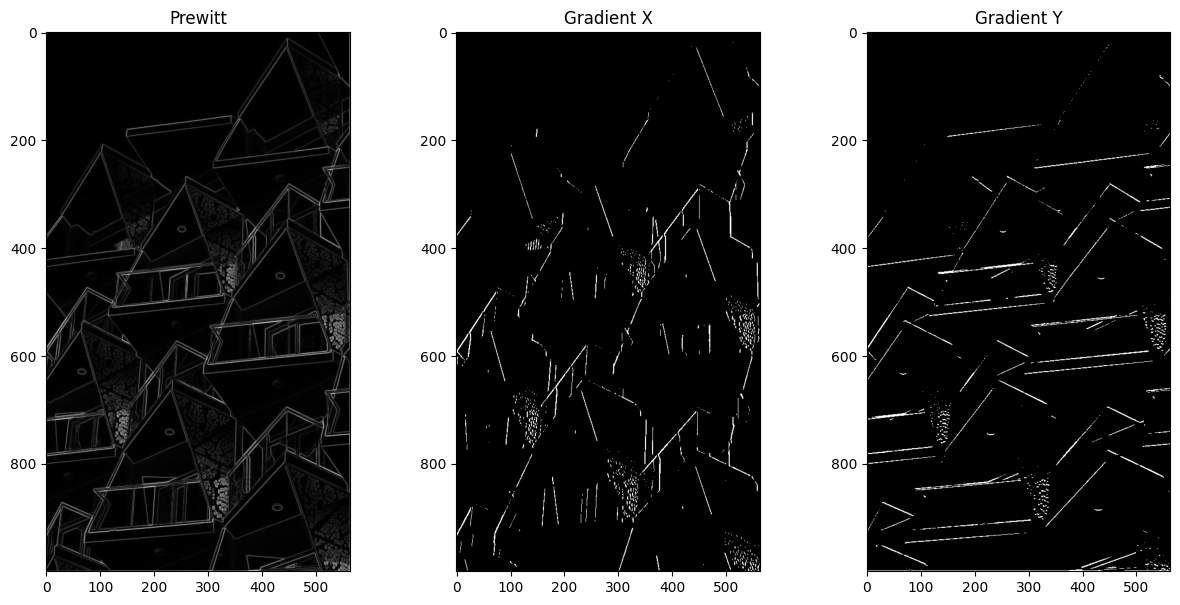

In [8]:
imgPrewitt, imgPrewittX, imgPrewittY = edgeDetection(image, prewittX, prewittY)
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,7))
ax[0].imshow(imgPrewitt, cmap="gray")
ax[0].set_title('Prewitt')
ax[1].imshow(imgPrewittX, cmap="gray")
ax[1].set_title('Gradient X')
ax[2].imshow(imgPrewittY, cmap="gray")
ax[2].set_title('Gradient Y')

### Melakukan Operator Roberts dengan memanggil function deteksi tepi yang telah dibuat sebelumnya dengan paramerte gambar yang akan digunakan lalu kernel x dan y dari roberts

Text(0.5, 1.0, 'Gradient Y')

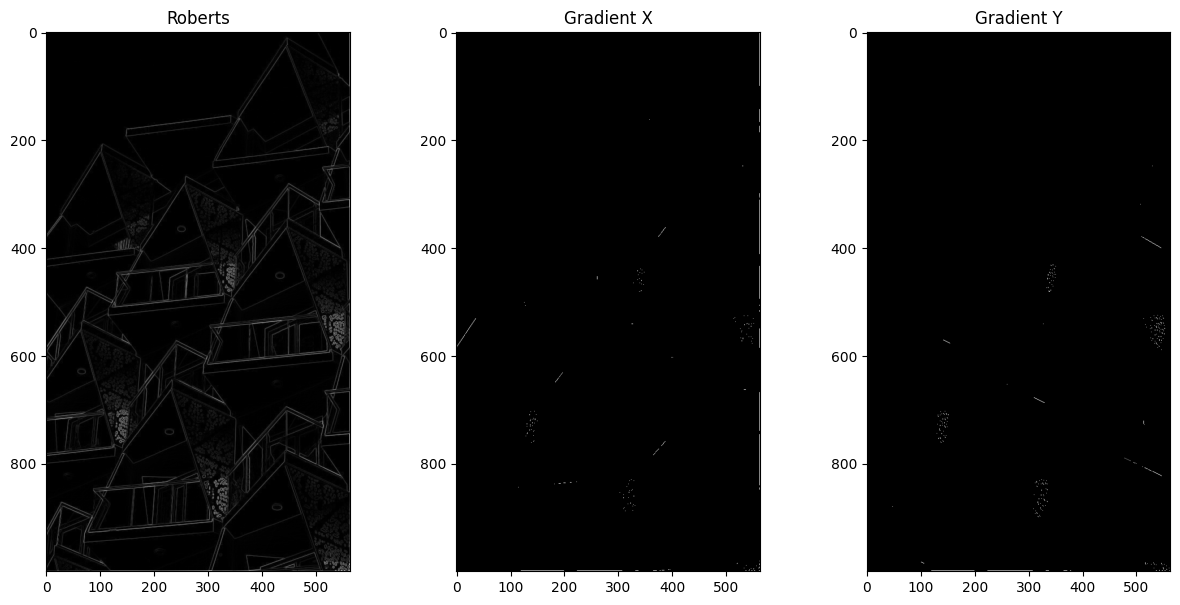

In [9]:
imgRoberts, imgRobertsX, imgRobertsY = edgeDetection(image, robertX, robertY)
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,7))
ax[0].imshow(imgRoberts, cmap="gray")
ax[0].set_title('Roberts')
ax[1].imshow(imgRobertsX, cmap="gray")
ax[1].set_title('Gradient X')
ax[2].imshow(imgRobertsY, cmap="gray")
ax[2].set_title('Gradient Y')

Text(0.5, 1.0, 'Robert')

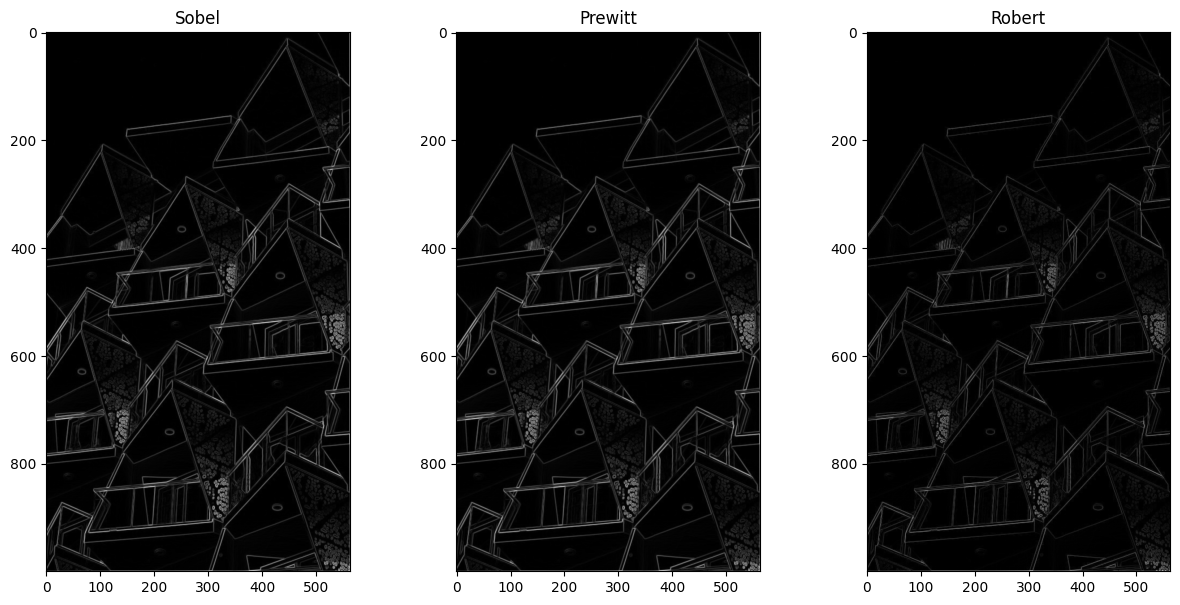

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,7))
ax[0].imshow(imgSobel, cmap="gray")
ax[0].set_title('Sobel')
ax[1].imshow(imgPrewitt, cmap="gray")
ax[1].set_title('Prewitt')
ax[2].imshow(imgRoberts, cmap="gray")
ax[2].set_title('Robert')


## 2 Buatlah method untuk mencari hasil terbaik dari ketiga metode no 1 dengan cara melihat jumlah warna yang diperoleh dari hasil deteksi tepi(Dapat menggunakan if-else statement)

### Function berikut berfungsi untuk mencari metode atau operator mana yang merupakan yang terbaik berdasarkan hasil deteksi tepi sebelumnya, dengan cara membandingkan total piksel yang ada pada setiap hasil operasi, jika salah satu operasi menghasilkan nilai piksel paling tinggi, maka operasi tersebut merupakan Operator atau Metode terbaik

Hasil Pendeteksian Tepi Terbaik Menggunakan Methode Sobel


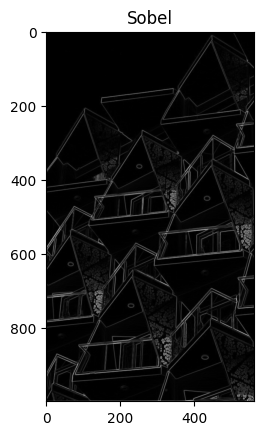

In [11]:
def bestMethode (sobel, prewitt, robert):
    temp = np.zeros(3).astype(int)
    for i in range(sobel.shape[0]):
        for j in range(sobel.shape[1]):
            temp[0]+= sobel[i,j]
            temp[1]+= prewitt[i,j]
            temp[2]+= robert[i,j]
    if np.argmax(temp) == 0:
        print("Hasil Pendeteksian Tepi Terbaik Menggunakan Methode Sobel")
        plt.imshow(sobel, cmap="gray")
        plt.title("Sobel")
    elif np.argmax(temp) == 1:
        print("Hasil Pendeteksian Tepi Terbaik Menggunakan Methode Prewitt")
        plt.imshow(prewitt, cmap="gray")
        plt.title("Prewitt")
    elif np.argmax(temp) == 2:
        print("Hasil Pendeteksian Tepi Terbaik Menggunakan Methode Roberts")
        plt.imshow(robert, cmap="gray")
        plt.title("Roberts")
bestMethode(imgSobel,imgPrewitt,imgRoberts)

